In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
col_names = ['Pregant', 'Glucose', 'BP', 'Skin', 'Insulin', 'BMI', 'Pedigree', 'age', 'label']
de = pd.read_csv("diabetes.csv", header = None, names=col_names)
de = de.iloc[1:769]
print(de.head())
print(de.shape)



  Pregant Glucose  BP Skin Insulin   BMI Pedigree age label
1       6     148  72   35       0  33.6    0.627  50     1
2       1      85  66   29       0  26.6    0.351  31     0
3       8     183  64    0       0  23.3    0.672  32     1
4       1      89  66   23      94  28.1    0.167  21     0
5       0     137  40   35     168  43.1    2.288  33     1
(768, 9)


In [18]:
X = de.drop('label', axis=1)
Y = de['label'] 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)


(614, 8)
(154, 8)


In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\SUBHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
Y_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy Score: {accuracy* 100:.2f}%")
print("\n classification Report:")
print(classification_report (Y_test,Y_pred))

Accuracy Score: 74.68%

 classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<Axes: >

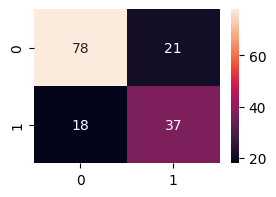

In [26]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(3,2))
sns.heatmap(conf, annot=True)